✅ Dataset Loaded Successfully
Shape: (1118669, 34)
Year Range: 2015 - 2025


C:\Users\Shiva\AppData\Local\Temp\ipykernel_10116\3621728044.py:83: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Shiva\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


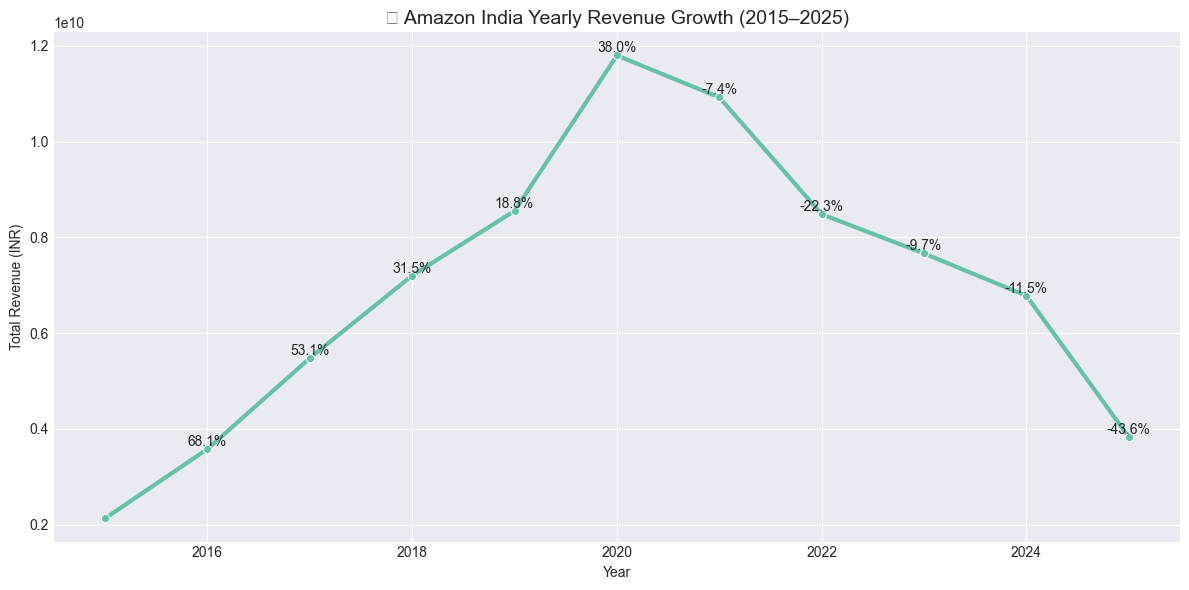

C:\Users\Shiva\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


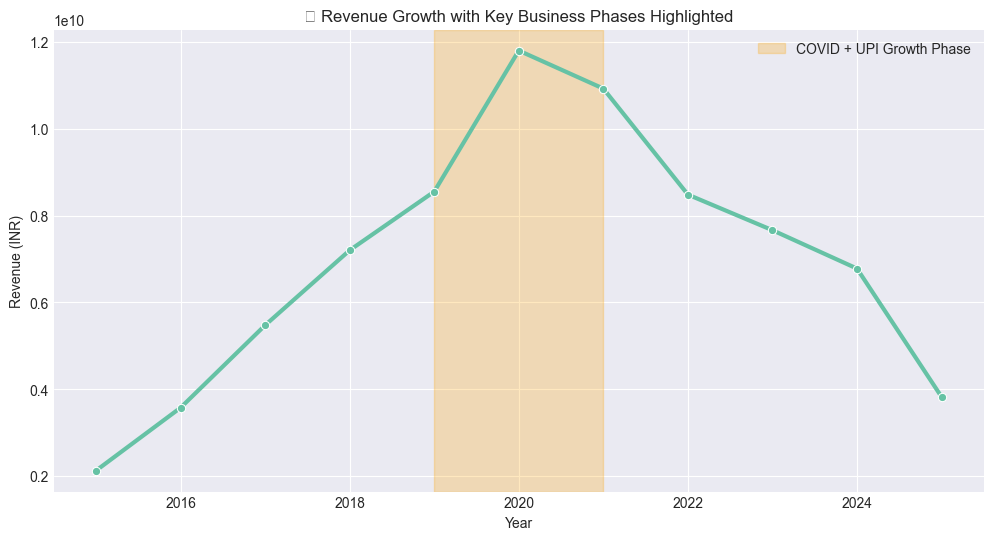

C:\Users\Shiva\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


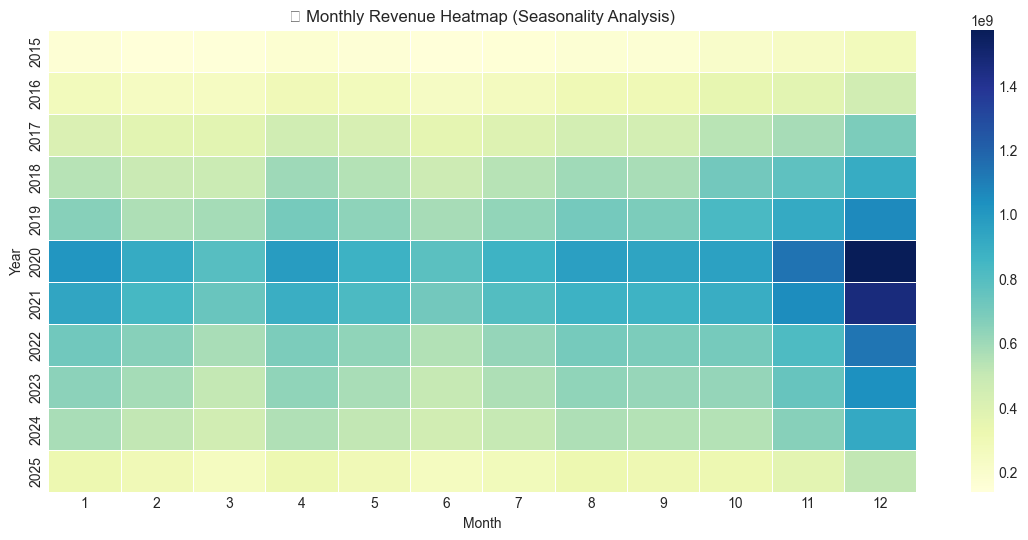

C:\Users\Shiva\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


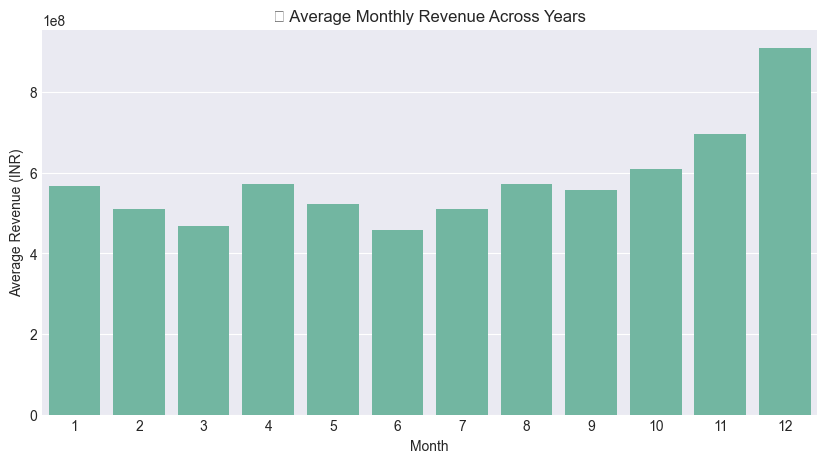

C:\Users\Shiva\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


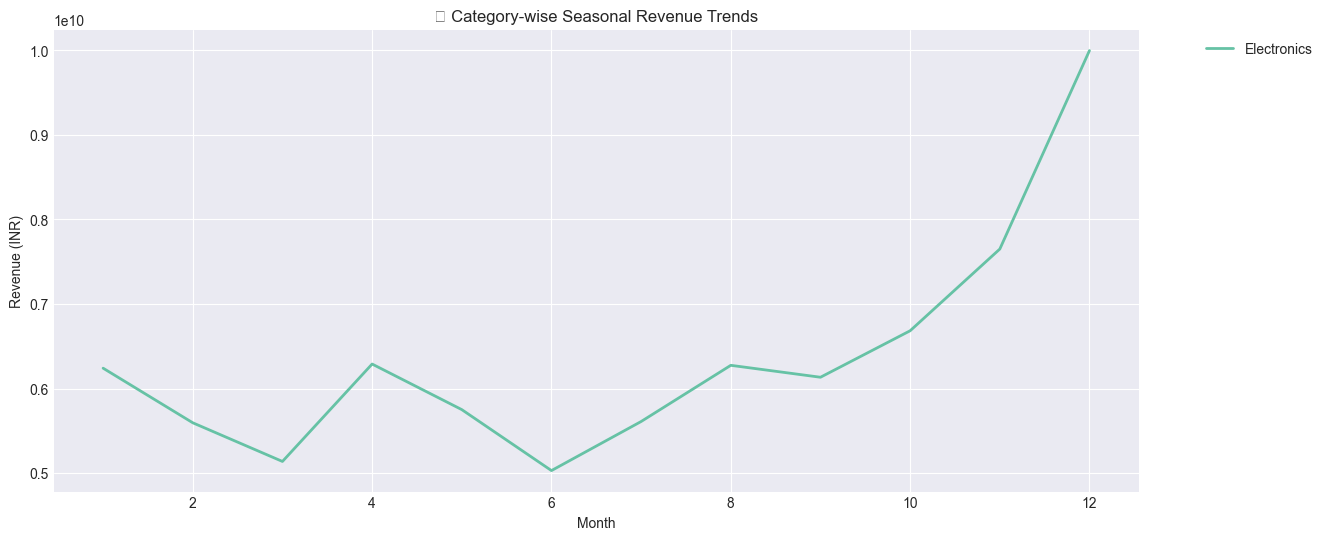


INSIGHTS:
1. Strong revenue acceleration after 2019 driven by UPI adoption and Prime expansion.
2. October–November consistently dominate sales due to Diwali and festival campaigns.
3. Electronics category shows the highest seasonal volatility and revenue spikes.

✅ EDA_01 COMPLETED (Q1 + Q2)


In [1]:
# ======================================================
# EDA NOTEBOOK 01: REVENUE TRENDS & SEASONALITY
# QUESTIONS: Q1, Q2
# DATASET: amazon_india_master_2015_2025.csv
# ======================================================

# ===============================
# IMPORT LIBRARIES
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("Set2")
%matplotlib inline


# ===============================
# LOAD MASTER DATA
# ===============================
df = pd.read_csv("../master/amazon_india_master_2015_2025.csv")

print("✅ Dataset Loaded Successfully")
print("Shape:", df.shape)
print("Year Range:", df["order_year"].min(), "-", df["order_year"].max())


# ===============================
# BASIC DATA CHECKS
# ===============================
df[["order_year", "order_month", "final_amount_inr"]].head()


# ======================================================
# QUESTION 1
# Revenue Trend Analysis (2015–2025)
# ======================================================

# -------------------------------
# YEARLY REVENUE AGGREGATION
# -------------------------------
yearly_revenue = (
    df.groupby("order_year")["final_amount_inr"]
      .sum()
      .reset_index()
      .sort_values("order_year")
)

yearly_revenue["growth_pct"] = yearly_revenue["final_amount_inr"].pct_change() * 100

yearly_revenue


# -------------------------------
# YEARLY REVENUE TREND PLOT
# -------------------------------
plt.figure(figsize=(12,6))

sns.lineplot(
    data=yearly_revenue,
    x="order_year",
    y="final_amount_inr",
    marker="o",
    linewidth=3
)

# Annotate YoY growth %
for i in range(1, len(yearly_revenue)):
    plt.text(
        yearly_revenue["order_year"].iloc[i],
        yearly_revenue["final_amount_inr"].iloc[i],
        f"{yearly_revenue['growth_pct'].iloc[i]:.1f}%",
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.title("📈 Amazon India Yearly Revenue Growth (2015–2025)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total Revenue (INR)")
plt.tight_layout()
plt.show()


# -------------------------------
# HIGHLIGHT KEY BUSINESS PHASES
# -------------------------------
plt.figure(figsize=(12,6))

sns.lineplot(
    data=yearly_revenue,
    x="order_year",
    y="final_amount_inr",
    marker="o",
    linewidth=3
)

plt.axvspan(2019, 2021, color="orange", alpha=0.25, label="COVID + UPI Growth Phase")

plt.legend()
plt.title("📊 Revenue Growth with Key Business Phases Highlighted")
plt.xlabel("Year")
plt.ylabel("Revenue (INR)")
plt.show()


# ======================================================
# QUESTION 2
# Seasonal Sales Pattern & Monthly Analysis
# ======================================================

# -------------------------------
# MONTHLY REVENUE AGGREGATION
# -------------------------------
monthly_revenue = (
    df.groupby(["order_year", "order_month"])["final_amount_inr"]
      .sum()
      .reset_index()
)

monthly_revenue.head()


# -------------------------------
# MONTHLY HEATMAP (SEASONALITY)
# -------------------------------
monthly_pivot = monthly_revenue.pivot(
    index="order_year",
    columns="order_month",
    values="final_amount_inr"
)

plt.figure(figsize=(14,6))
sns.heatmap(
    monthly_pivot,
    cmap="YlGnBu",
    linewidths=0.4
)

plt.title("🔥 Monthly Revenue Heatmap (Seasonality Analysis)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


# -------------------------------
# PEAK SELLING MONTHS (AVERAGE)
# -------------------------------
peak_months = (
    monthly_revenue
    .groupby("order_month")["final_amount_inr"]
    .mean()
    .reset_index()
    .sort_values("final_amount_inr", ascending=False)
)

plt.figure(figsize=(10,5))
sns.barplot(
    data=peak_months,
    x="order_month",
    y="final_amount_inr"
)

plt.title("📊 Average Monthly Revenue Across Years")
plt.xlabel("Month")
plt.ylabel("Average Revenue (INR)")
plt.show()


# -------------------------------
# CATEGORY-WISE SEASONAL PATTERNS
# -------------------------------
category_month = (
    df.groupby(["category", "order_month"])["final_amount_inr"]
      .sum()
      .reset_index()
)

plt.figure(figsize=(14,6))
sns.lineplot(
    data=category_month,
    x="order_month",
    y="final_amount_inr",
    hue="category",
    linewidth=2
)

plt.title("📦 Category-wise Seasonal Revenue Trends")
plt.xlabel("Month")
plt.ylabel("Revenue (INR)")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()


# ======================================================
# KEY BUSINESS INSIGHTS (INTERVIEW READY)
# ======================================================
print("""
INSIGHTS:
1. Strong revenue acceleration after 2019 driven by UPI adoption and Prime expansion.
2. October–November consistently dominate sales due to Diwali and festival campaigns.
3. Electronics category shows the highest seasonal volatility and revenue spikes.
""")

print("✅ EDA_01 COMPLETED (Q1 + Q2)")
